# Project: No-show patient

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#exploring">Exploring Data</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **This dataset collects information from 100k medical appointments in Brazil that are appointed between 04/29/2016 and 06/08/2016 and is focused on the question fo whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

Example question

What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

df = pd.read_csv('noshow2016.csv')

In [218]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [219]:
df.rename(columns = {'AppointmentID': 'appointment_id',
                    'ScheduledDay': 'scheduled_day',
                    'AppointmentDay': 'appointment_day',
                    'Hipertension':'hypertension',
                    'Handcap': 'handicap',
                    'No-show': 'no_show',
                    'PatientId':'patient_id'}, inplace = True)

df.head(1)

,patient_id,appointment_id,Gender,scheduled_day,appointment_day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [220]:
df.columns = df.columns.str.lower()

In [221]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [223]:
# convert dtype on scheduled_day and appointment_day datetime to datetime dtype 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [225]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [226]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.normalize()
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [227]:
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [228]:
df.duplicated().sum()

0

No duplicated or missing value

In [229]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day         111
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
no_show                 2
dtype: int64

In [230]:
df['waiting_time'] = df['appointment_day'] - df['scheduled_day']

In [231]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
waiting_time       110527 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(3), timedelta64[ns](1)
memory usage: 12.6+ MB


In [233]:
df['waiting_time'] = df['waiting_time'].astype(str)

In [234]:
df['waiting_time'] = df['waiting_time'].str.extract('(\d+)').astype(int)

In [235]:
# See if there is any outliers
print('Unique Value')
print('age:', sorted(df['age'].unique()))
print('scholarship:', df['scholarship'].unique())
print('hypertension:', df['hypertension'].unique())
print('diabetes:', df['diabetes'].unique())
print('alcoholism:', df['alcoholism'].unique())
print('handicap:', df['handicap'].unique())
print('sms_received:', df['sms_received'].unique())
print('waiting_time:', df['waiting_time'].unique())

Unique Value
age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
scholarship: [0 1]
hypertension: [1 0]
diabetes: [0 1]
alcoholism: [0 1]
handicap: [0 1 2 3 4]
sms_received: [0 1]
waiting_time: [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127 111
 119 

In [236]:
# Age outliers
df[df['age'] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [237]:
df[df['age'] >= 96 ]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
969,1.294694e+14,5588126,F,2016-04-15,2016-04-29,98,BONFIM,0,1,0,0,0,0,Yes,14
983,8.249688e+13,5520168,M,2016-03-29,2016-04-29,98,SÃO PEDRO,0,1,0,0,0,1,No,31
5401,3.518546e+11,5675430,M,2016-05-09,2016-05-11,96,JARDIM DA PENHA,0,0,0,0,0,0,No,2
9437,8.758612e+13,5692481,F,2016-05-12,2016-05-18,96,MARUÍPE,0,1,0,0,0,0,No,6
14176,1.882198e+11,5732443,F,2016-05-24,2016-05-24,96,JABOUR,0,0,0,0,0,0,No,0
14345,6.451675e+13,5721500,M,2016-05-19,2016-05-20,96,SANTO ANDRÉ,0,1,0,0,0,0,No,1
18317,5.659244e+14,5704081,F,2016-05-16,2016-05-16,97,PARQUE MOSCOSO,0,1,1,0,0,0,No,0
23389,3.794954e+13,5695368,F,2016-05-13,2016-05-13,96,CONSOLAÇÃO,0,1,0,0,1,0,No,0
24127,5.253828e+14,5682354,F,2016-05-10,2016-05-10,97,SANTA TEREZA,0,1,0,0,0,0,No,0
24129,5.234117e+14,5664305,F,2016-05-05,2016-05-05,96,DO QUADRO,0,1,0,0,0,0,No,0


In [238]:
#drop outliers
df.drop(df[df['age'] < 0].index, axis = 0, inplace=True)
df.drop(df[df['age'] >= 96].index, axis = 0, inplace=True)

In [239]:
#check
df[df.age < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time


In [240]:
df[df.age >= 96]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110480 non-null float64
appointment_id     110480 non-null int64
gender             110480 non-null object
scheduled_day      110480 non-null datetime64[ns]
appointment_day    110480 non-null datetime64[ns]
age                110480 non-null int64
neighbourhood      110480 non-null object
scholarship        110480 non-null int64
hypertension       110480 non-null int64
diabetes           110480 non-null int64
alcoholism         110480 non-null int64
handicap           110480 non-null int64
sms_received       110480 non-null int64
no_show            110480 non-null object
waiting_time       110480 non-null int32
dtypes: datetime64[ns](2), float64(1), int32(1), int64(8), object(3)
memory usage: 13.1+ MB


In [242]:
#convert Yes No value in no_show columns to numical value
# Yes = 1, No = 0
#df.no_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [243]:
#convert M F value in gender columns to numical value
# M = 1, F = 0
#df.gender.replace(('M', 'F'), (1,0), inplace=True)

In [244]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [245]:
df[df.no_show == 'Yes'].count() #did not show up

patient_id         22312
appointment_id     22312
gender             22312
scheduled_day      22312
appointment_day    22312
age                22312
neighbourhood      22312
scholarship        22312
hypertension       22312
diabetes           22312
alcoholism         22312
handicap           22312
sms_received       22312
no_show            22312
waiting_time       22312
dtype: int64

In [246]:
df[df.no_show == 'No'].count() #show up

patient_id         88168
appointment_id     88168
gender             88168
scheduled_day      88168
appointment_day    88168
age                88168
neighbourhood      88168
scholarship        88168
hypertension       88168
diabetes           88168
alcoholism         88168
handicap           88168
sms_received       88168
no_show            88168
waiting_time       88168
dtype: int64

In [247]:
df.shape

(110480, 15)

In [248]:
df.to_csv('noshow_allcleaned_data.csv', index = False)

<a id='exploring'></a>
# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('noshow_allcleaned_data.csv')

In [2]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


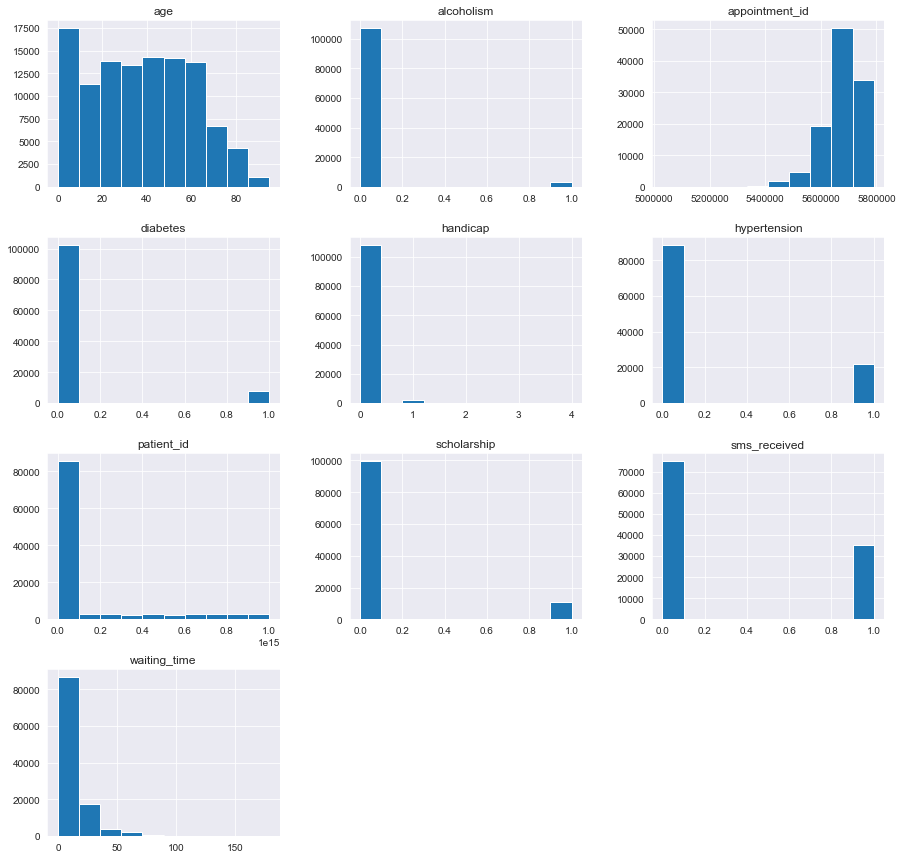

In [3]:
df.hist(figsize = (15,15));

In [4]:
N_show=df.no_show.value_counts()

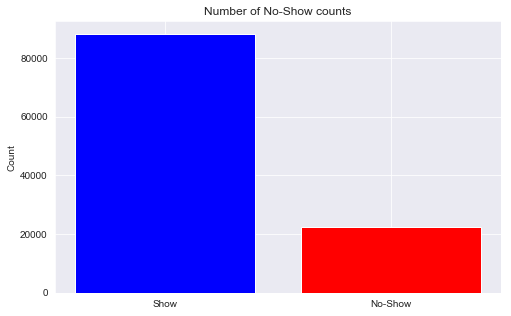

In [5]:
plt.subplots(figsize = (8,5))
plt.bar(["Show", "No-Show"], N_show, color = ['blue','red'])
plt.title('Number of No-Show counts')
plt.ylabel('Count');

In [6]:
N_show #No means showed up Yes means did not showed up

No     88168
Yes    22312
Name: no_show, dtype: int64

In [7]:
22312/110480 #Approximately 20% of patient did not show up

0.20195510499637945

In [8]:
88168/110480 #Approximately 80% of patient showed up

0.7980448950036205

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

# Q1: Does Age affect No-show?

In [9]:
df['age_group'] = pd.cut(df.age, bins=[g for g in range(0, 95, 5)], include_lowest=True)

In [10]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(60.0, 65.0]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(55.0, 60.0]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(60.0, 65.0]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(5.0, 10.0]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(55.0, 60.0]"


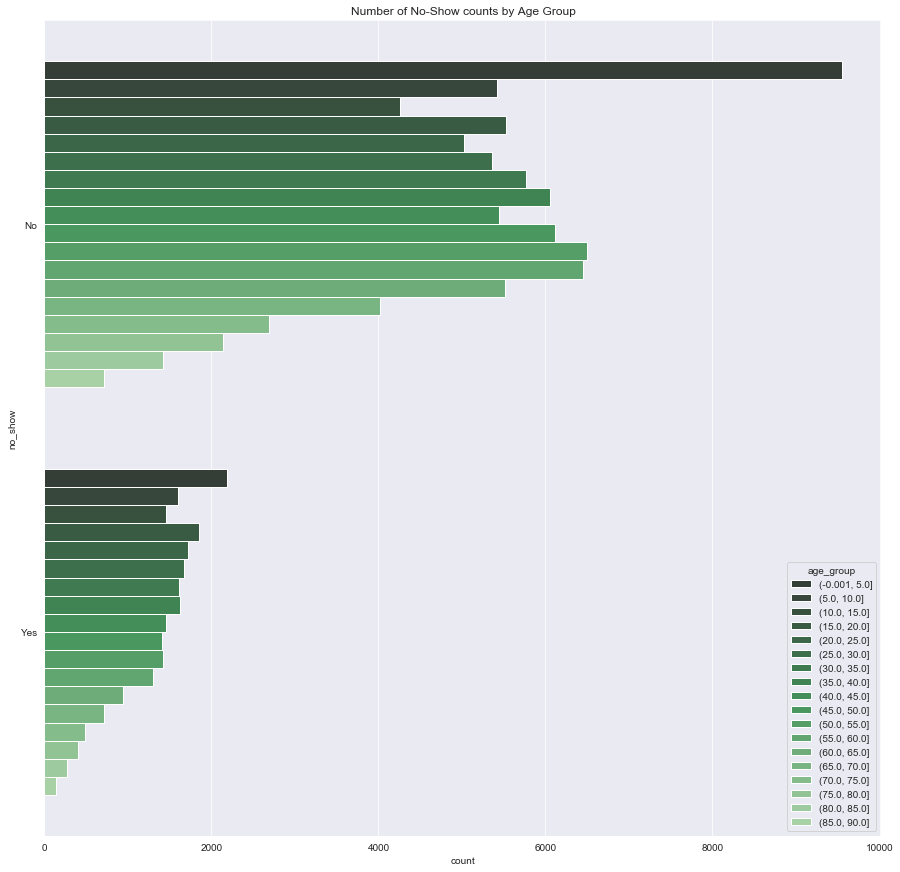

In [11]:
plt.subplots(figsize = (15,15))
plt.title('Number of No-Show counts by Age Group')
sns.countplot(y='no_show', hue='age_group', data=df, palette="Greens_d")

## Youngest age range have highest no_show

In [2]:
df.no_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [13]:
age_noshow = df.groupby('age_group').no_show.mean()

In [14]:
age_noshow.to_csv('age_noshow.csv')

In [15]:
labels = ['age_range', 'no_show']
age_noshow = pd.read_csv('age_noshow.csv', names=labels)

In [16]:
age_noshow

,age_range,no_show
0,"(-0.001, 5.0]",0.186259
1,"(5.0, 10.0]",0.228413
2,"(10.0, 15.0]",0.255289
3,"(15.0, 20.0]",0.250407
4,"(20.0, 25.0]",0.255073
5,"(25.0, 30.0]",0.237770
6,"(30.0, 35.0]",0.218394
7,"(35.0, 40.0]",0.211198
8,"(40.0, 45.0]",0.211533
9,"(45.0, 50.0]",0.187550


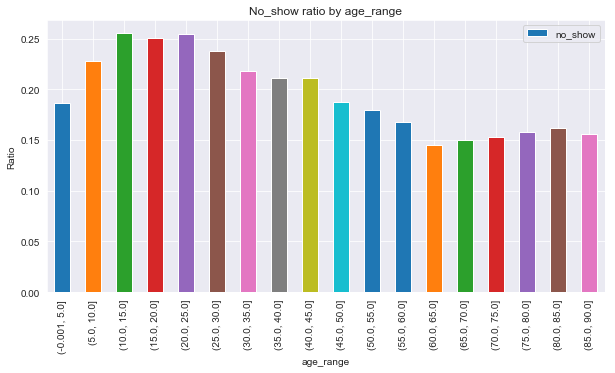

In [17]:
age_noshow.plot(x = 'age_range', y = 'no_show',kind = 'bar', figsize =(10,5))
plt.title('No_show ratio by age_range')
plt.ylabel('Ratio');

## However, age range between 10 and 15 had highest average of noshow 25.5%

# Q2: Does Waiting time affect No_show?

In [18]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,"(60.0, 65.0]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,"(55.0, 60.0]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,"(60.0, 65.0]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,"(5.0, 10.0]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,"(55.0, 60.0]"


In [19]:
df.waiting_time.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

In [20]:
df.waiting_time.min()

0

In [21]:
df.waiting_time.max()

179

In [22]:
df['waiting_time'] = pd.cut(df.waiting_time, bins=[g for g in range(0, 182, 7)], include_lowest=True) # 7day (by 1 week)

In [23]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,"(-0.001, 7.0]","(60.0, 65.0]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,"(-0.001, 7.0]","(55.0, 60.0]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,"(-0.001, 7.0]","(60.0, 65.0]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,"(-0.001, 7.0]","(5.0, 10.0]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,"(-0.001, 7.0]","(55.0, 60.0]"


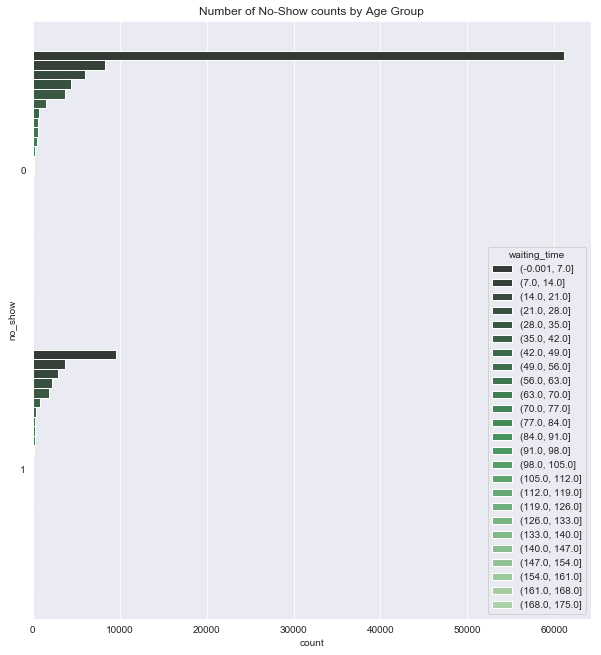

In [24]:
plt.subplots(figsize = (10,11))
plt.title('Number of No-Show counts by Age Group')
sns.countplot(y='no_show', hue='waiting_time', data=df, palette="Greens_d");

In [25]:
waiting_noshow = df.groupby('waiting_time').no_show.mean()

In [26]:
waiting_noshow.to_csv('waiting_noshow.csv')

In [27]:
labels = ['waiting', 'no_show']
waiting_noshow = pd.read_csv('waiting_noshow.csv', names = labels)

In [28]:
waiting_noshow

,waiting,no_show
0,"(-0.001, 7.0]",0.135252
1,"(7.0, 14.0]",0.304691
2,"(14.0, 21.0]",0.322584
3,"(21.0, 28.0]",0.336715
4,"(28.0, 35.0]",0.331814
5,"(35.0, 42.0]",0.349094
6,"(42.0, 49.0]",0.323132
7,"(49.0, 56.0]",0.313981
8,"(56.0, 63.0]",0.290323
9,"(63.0, 70.0]",0.314788


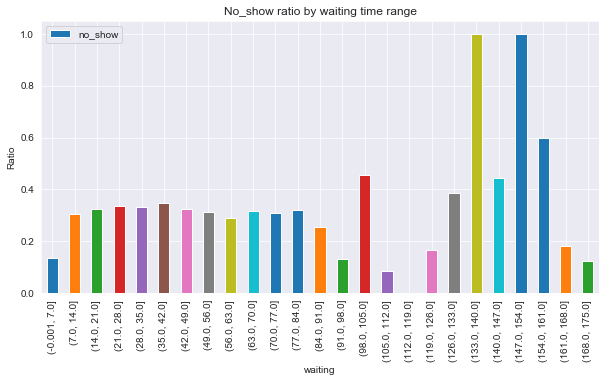

In [29]:
waiting_noshow.plot(x = 'waiting', y = 'no_show',kind = 'bar', figsize =(10,5))
plt.title('No_show ratio by waiting time range')
plt.ylabel('Ratio');

## Between 0 to 7 days waiting time had highest no-show count on patient
## However, by caculating ratio between 133 and 140, 147 and 154 had highest ratio of not showing up

## Gender variable is not good to compare since Female population is double size of  Male population

In [10]:
df.gender.value_counts()

F    71802
M    38678
Name: gender, dtype: int64

<a id='conclusions'></a>
## Conclusions

Of all the patient approximately 20% of the patient did not show up on appointmented date and 80% of patient showed up.
Using "Age" variable on no-show, age range between 0 and 5 had highest no-show count. However, age range between 10 and 15 had highest average of noshow 25.5%.
Using "Waiting time" as variable on no-show, time range between 1 and 7 days had highst no-show count. However, by caculating ratio between 133 and 140, 147 and 154 had highest ratio of not showing up.

Youngest "age" and shortest "waiting time" have hist no-show count since both of them recorded highest patient population.